In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
data = pd.read_csv('./Data Directory/crypto-markets.csv',parse_dates=['date'], index_col='date')
print(data)

                    slug symbol          name  ranknow        open  \
date                                                                 
2013-04-28       bitcoin    BTC       Bitcoin        1  135.300000   
2013-04-29       bitcoin    BTC       Bitcoin        1  134.440000   
2013-04-30       bitcoin    BTC       Bitcoin        1  144.000000   
2013-05-01       bitcoin    BTC       Bitcoin        1  139.000000   
2013-05-02       bitcoin    BTC       Bitcoin        1  116.380000   
2013-05-03       bitcoin    BTC       Bitcoin        1  106.250000   
2013-05-04       bitcoin    BTC       Bitcoin        1   98.100000   
2013-05-05       bitcoin    BTC       Bitcoin        1  112.900000   
2013-05-06       bitcoin    BTC       Bitcoin        1  115.980000   
2013-05-07       bitcoin    BTC       Bitcoin        1  112.250000   
2013-05-08       bitcoin    BTC       Bitcoin        1  109.600000   
2013-05-09       bitcoin    BTC       Bitcoin        1  113.200000   
2013-05-10       bit

In [3]:
response = requests.get("http://localhost:5000/parse",params={"q":"Closing value of bitcoin on 19-01-2018"})
response = response.json()
print (response)
entities = response.get("entities")
intent = response.get("intent")

{'entities': [{'start': 17, 'extractor': 'ner_crf', 'end': 24, 'value': 'bitcoin', 'entity': 'Crypto'}, {'start': 28, 'extractor': 'ner_crf', 'end': 38, 'value': '19-01-2018', 'entity': 'date'}], 'intent': {'confidence': 0.5137606618784905, 'name': 'GetCloseByDate'}, 'text': 'Closing value of bitcoin on 19-01-2018', 'intent_ranking': [{'confidence': 0.5137606618784905, 'name': 'GetCloseByDate'}, {'confidence': 0.0694217855626597, 'name': 'GetHighestValueByName'}, {'confidence': 0.060514596723437376, 'name': 'goodbye'}, {'confidence': 0.059634753041302176, 'name': 'GetStatusByName'}, {'confidence': 0.05697550865602351, 'name': 'Prediction'}, {'confidence': 0.055822525527833004, 'name': 'CryptoList'}, {'confidence': 0.04238421937751399, 'name': 'intro'}, {'confidence': 0.04174483371196994, 'name': 'PlotCurrencyGraph'}, {'confidence': 0.03624406479517141, 'name': 'greet'}, {'confidence': 0.03341220909085452, 'name': 'AttributesKnowledgeBase'}]}


In [28]:
#Closing value for date
for i in entities:
    if i['entity'] =='Crypto':
        crypto=str(i['value'].title())
    if i['entity']=='date':
        temp=pd.to_datetime(i['value'],format='%d-%m-%Y')
        data1 = data.loc[data.index == temp]
x=data1.loc[data1['name']==crypto]
print("Response text: "+str(x['close'][0]))

Response text: 11607.4


In [29]:
#highest value by name
response_text=''
data1 = data.groupby('name')['high'].max()
for i in entities:
    temp=str(i['value']).title()
    response_text = response_text + str(i['value'].title()) + " Highest value ever was $" + str(data1[temp]) + "\n"
print(response_text)

KeyError: '19-01-2018'

In [9]:
#Attributes
response= data.columns.values.tolist()
print(str(response)[1:-1])

'slug', 'symbol', 'name', 'ranknow', 'open', 'high', 'low', 'close', 'volume', 'market', 'close_ratio', 'spread'


In [10]:
#Status
response_text =''
for i in entities:
    data1 = data.loc[data['name'] == i['value'].title()]
    response_text = response_text + str(i['value'].title()) +' last known value to me for the date ' +str(data1.index[-1].date()) +' is : ' +str(data1['close'][-1]) +"\n"
print (response_text)

Bitcoin last known value to me for the date 2018-06-06 is : 7653.98
Ethereum last known value to me for the date 2018-06-06 is : 607.12



In [11]:
#crypto list
response_text = "The list of cryptos currently in my database include "
final_data = data.name.unique()
final_data = str(final_data)
response_text = response_text + final_data[1:-1]
print(response_text)

The list of cryptos currently in my database include 'Bitcoin' 'Ethereum' 'Ripple' ... 'ENTCash' 'Jingtum Tech' 'Aston'


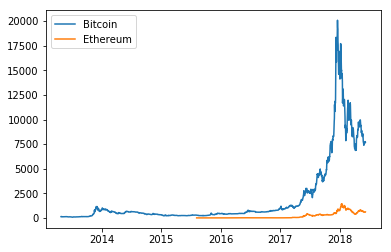

In [14]:
#plot graph
for i in entities:
    data1 = data.loc[data['name'] == i['value'].title()]
    plt.plot(data1['high'],label=i['value'].title())
    plt.legend(loc='best')
plt.show()